# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [24]:
# Example reading the SQL database from here

from utils import db_connect
import pandas as pd
import matplotlib.pyplot as plt

#engine = db_connect()

#dataframe = pd.read_sql("Select * from books;", engine)
#print(dataframe.describe())

In [5]:
# Example importing the CSV here

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [14]:
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
32587,25547839,"Bright Modern LUX 1BR with pool, gym and sauna",69578078,Olivia,Manhattan,Hell's Kitchen,40.76243,-73.99805,Entire home/apt,299,1,31,2019-06-30,2.74,1,84
9699,7457673,NEW Modern Brooklyn 1BR Apt!,2203415,James,Brooklyn,Bedford-Stuyvesant,40.68678,-73.95130,Entire home/apt,85,1,6,2015-11-29,0.13,1,0
48700,36389944,Family Friendly Apt in Midtown East,224309949,Efrat,Manhattan,Midtown,40.75988,-73.96591,Entire home/apt,325,5,0,NaN,NaN,1,298
3264,1948494,Amazing 550 Sq Ft Studio Apartment.,9950152,Dawn & Vernon,Brooklyn,East Flatbush,40.63803,-73.94894,Entire home/apt,97,3,177,2019-07-07,2.64,1,272
6170,4513084,Beautiful Sunny Private Penthouse Suite,23401472,Heather,Manhattan,Harlem,40.82624,-73.94527,Entire home/apt,150,30,1,2016-07-30,0.03,2,244


In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
df['host_name'].nunique()

11452

In [12]:
df['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [13]:
df['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [ ]:
#descartar host_name

In [17]:
for var in ['neighbourhood', 'neighbourhood_group', 'room_type', 'host_id'] :
    df[var] = pd.Categorical(df[var])

df['last_review'] = df['last_review'].astype('datetime64')

#Check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  category      
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  category      
 5   neighbourhood                   48895 non-null  category      
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  category      
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [18]:
df_duplicates = df['id'].duplicated().sum()

print(f'There are {df_duplicates} "duplicated entries" (with same id)')

There are 0 duplicated entries


In [20]:
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


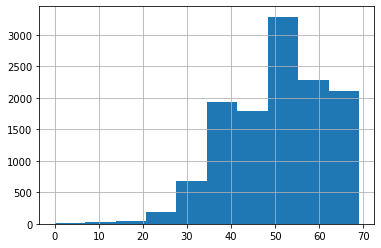

In [25]:
df[df['price'] <= 69]['price'].hist()
plt.show()

In [28]:
#df[df['price'] <= 69]['price'].hist(by='room_type')
#plt.show()
len(df[df['price'] < 20])

54

In [ ]:
#Remove Obs with price > 20


In [29]:
#df_price.head()
#plt.figure(figsize=(12,8))
#df = df_price[df_price['minimum_nights']==1]
#df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
#df1.plot(kind='bar')
#plt.title('Average Price for rooms in neighbourhood group')
#plt.ylabel('Average Daily Price')
#plt.xlabel('Neighbourhood Group')
#plt.show()
#print('List of Average Price per night based on the neighbourhood group')
#pd.DataFrame(df1).sort_values(by='room_type')

NameError: name 'df_price' is not defined